# Time Series Analysis And Foreasting with Python

This Prohject will mainly showcase my ability to forecast a time series with ARIMA Model. ARIMA Model is used to forecast a time series using the series past valus. In this notebook, I will build a Seasonal ARIMA(SARIMA) in python to forecast the stock price of Barclays Bank in 3 months from Febuary 2023.

Data Sources: [Marcotrends](https://www.macrotrends.net/stocks/charts/BCS/barclays/stock-price-history)

## 1. Import Packages and Data

In [1]:
# import packages 
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.colors
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima

In [3]:
#Load Data
BCS_PATH='BCS_data.csv'
bcs_df=pd.read_csv(BCS_PATH,parse_dates=['date'],index_col='date')
print(bcs_df.nunique()),print(bcs_df)

open      6294
high      6346
low       6384
close     6217
volume    5563
dtype: int64
              open    high     low   close   volume
date                                               
1986-09-10  1.5115  1.5238  1.5115  1.5238     3402
1986-09-11  1.5179  1.5179  1.4963  1.4963   158801
1986-09-12  1.4623  1.4623  1.4500  1.4623    12503
1986-09-15  1.4746  1.4963  1.4746  1.4746    31197
1986-09-16  1.4623  1.4623  1.4500  1.4623     3900
...            ...     ...     ...     ...      ...
2023-02-16  8.1125  8.2583  8.0931  8.2194  4282893
2023-02-17  8.1805  8.2000  8.1222  8.1903  5197732
2023-02-21  8.2000  8.2145  8.0640  8.1028  4375591
2023-02-22  8.1125  8.1876  8.0931  8.1222  5765904
2023-02-23  8.4100  8.4250  8.2500  8.3200  5932091

[9188 rows x 5 columns]


(None, None)

In [4]:
bcs_date=bcs_df.index.unique()
bcs_date.shape

(9188,)

## 2. Data Visualization

### 2.1 Closing Pricing Visualization

Text(0.5, 1.0, 'Closing Price Trend')

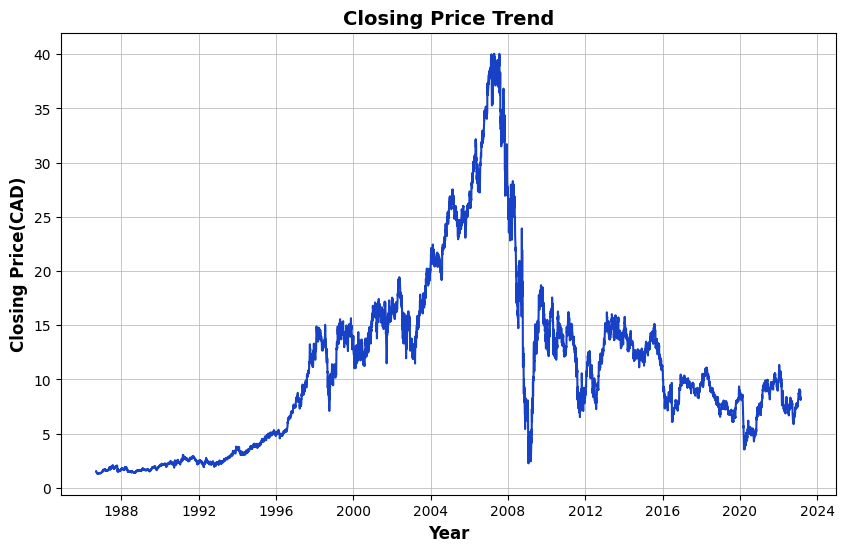

In [5]:
#Plot the closing price trend of Baclays
plt.figure(figsize=(10,6))
plt.grid(True,linewidth=0.5)

plt.plot(bcs_date,bcs_df['close'],label="BCS",c='#1741C6',alpha=1,linewidth=1.5)
plt.xlabel('Year',weight="bold",size=12)
plt.ylabel('Closing Price(CAD)',weight='bold',size=12)
plt.title('Closing Price Trend',weight='bold',size=14)


### 2.2 Time Series Moving Average

In [6]:
df=bcs_df.copy()
col='AdjustedClose'
periods=[5,10,20,30,50]
for period in periods:                 df.loc[:,"MovingAvg_{}Day".format(period)]=df['close'].rolling(window=period).mean().values

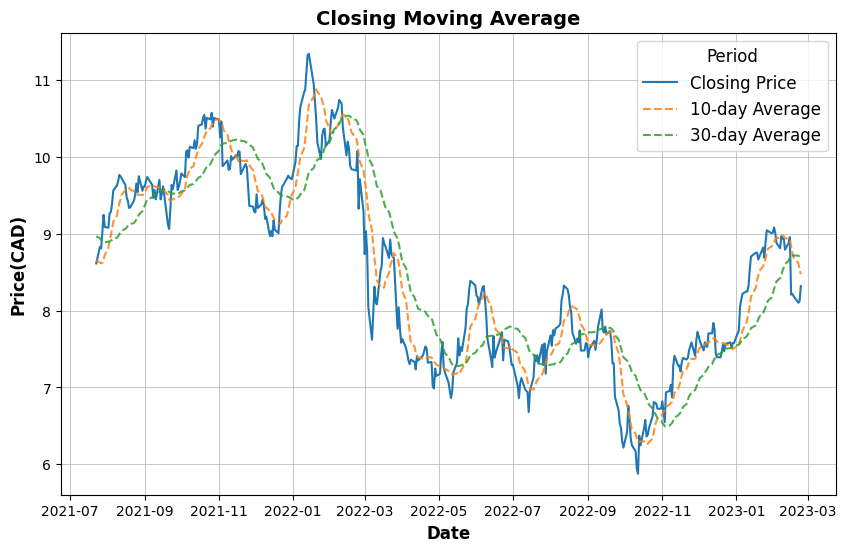

In [7]:
plt.figure(figsize=(10,6))
plt.grid(True,linewidth=0.5)
plt.plot(bcs_date[8788:9188],df['close'][8788:9188],label='Closing Price',alpha=1,linewidth=1.5)
plt.plot(bcs_date[8788:9188],df['MovingAvg_10Day'][8788:9188],label='10-day Average',linestyle='--',alpha=0.85,linewidth=1.5)
plt.plot(bcs_date[8788:9188],df['MovingAvg_30Day'][8788:9188],label='30-day Average',linestyle='--',alpha=0.85,linewidth=1.5)

plt.xlabel('Date',weight='bold',size=12)
plt.ylabel('Price(CAD)',weight='bold',size=12)
plt.title('Closing Moving Average',weight='bold',size=14)
plt.legend(fontsize="large",title="Period",title_fontsize=12)
plt.show()

## 3. Predictive Analysis- SARIMA

### 3.1 Determine wheather the data is seasonal or not

In [8]:
y=bcs_df.reset_index()[['date','close']][8788:9188]

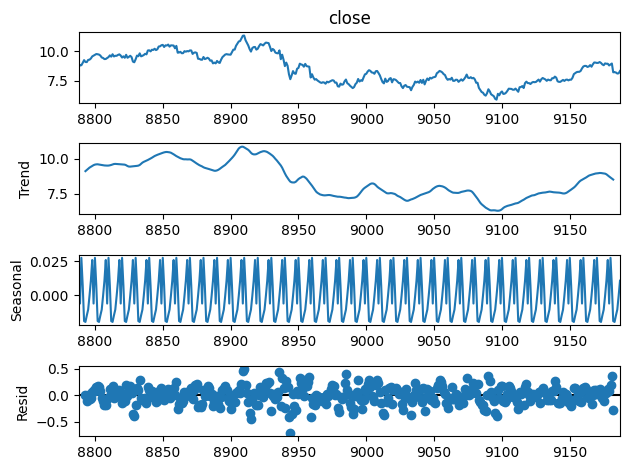

In [9]:
#Determine wheather the data is seasonal or not
decomposition=sm.tsa.seasonal_decompose(y['close'],model='addictive',period=10)
fig=decomposition.plot()
plt.show()

Conclusion: seasonal data exist

### 3.2 SARIMA Modelling

In [10]:
#Start from 2021-09-23 End 2023-02-23
bcs_df_subset_s=bcs_df[8831:9188].copy()
bcs_df_subset_s

,open,high,low,close,volume
date,,,,,
2021-09-23,9.5325,9.6506,9.5137,9.6357,3218636
2021-09-24,9.5606,9.6591,9.5512,9.5794,2552866
2021-09-27,9.7013,9.8515,9.7013,9.8233,2777028
2021-09-28,9.6732,9.7201,9.5606,9.5700,4522664
2021-09-29,9.6075,9.6544,9.5368,9.6169,3413454
...,...,...,...,...,...
2023-02-16,8.1125,8.2583,8.0931,8.2194,4282893
2023-02-17,8.1805,8.2000,8.1222,8.1903,5197732
2023-02-21,8.2000,8.2145,8.0640,8.1028,4375591


In [11]:
train_data_s,test_data_s=bcs_df_subset_s[0:int(len(bcs_df_subset_s)*0.8)],bcs_df_subset_s[int(len(bcs_df_subset_s)*0.8):]

In [12]:
#Choosing the Optimal Model
smodel=auto_arima(bcs_df_subset_s['close'],start_p=1,start_q=1,
                 test='adf',
                 max_p=3,max_q=3,
                 m=30,
                 start_P=0,seasonal=True,
                 d=None,D=1,trace=True,
                 error_action='ignore',suppress_warnings=True,
                 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[30]             : AIC=inf, Time=51.60 sec
 ARIMA(0,1,0)(0,1,0)[30]             : AIC=76.232, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[30]             : AIC=5.623, Time=9.13 sec
 ARIMA(0,1,1)(0,1,1)[30]             : AIC=inf, Time=49.69 sec
 ARIMA(1,1,0)(0,1,0)[30]             : AIC=78.160, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[30]             : AIC=-24.592, Time=23.33 sec
 ARIMA(1,1,0)(2,1,1)[30]             : AIC=inf, Time=101.19 sec
 ARIMA(1,1,0)(1,1,1)[30]             : AIC=inf, Time=36.28 sec
 ARIMA(0,1,0)(2,1,0)[30]             : AIC=-26.495, Time=17.83 sec
 ARIMA(0,1,0)(1,1,0)[30]             : AIC=3.722, Time=4.47 sec
 ARIMA(0,1,0)(2,1,1)[30]             : AIC=inf, Time=75.12 sec
 ARIMA(0,1,0)(1,1,1)[30]             : AIC=inf, Time=31.60 sec
 ARIMA(0,1,1)(2,1,0)[30]             : AIC=-24.580, Time=24.09 sec
 ARIMA(1,1,1)(2,1,0)[30]             : AIC=-22.712, Time=50.60 sec
 ARIMA(0,1,0)(2,1,0)[30] intercept   : AIC=-24.528, 

### 3.3 Forecasting Visualization

In [13]:
#Forecast the stock price in 3 months
n_periods=30*3
s_fitted,confint=smodel.predict(n_periods=n_periods,return_conf_int=True)
index_of_fc=pd.date_range(bcs_df_subset_s.index[-1],periods=n_periods,freq='D')

#make series for plotting purpose
fitted_series=pd.Series(s_fitted.values,index=index_of_fc)
lower_series=pd.Series(confint[:,0],index=index_of_fc)
upper_series=pd.Series(confint[:,1],index=index_of_fc)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


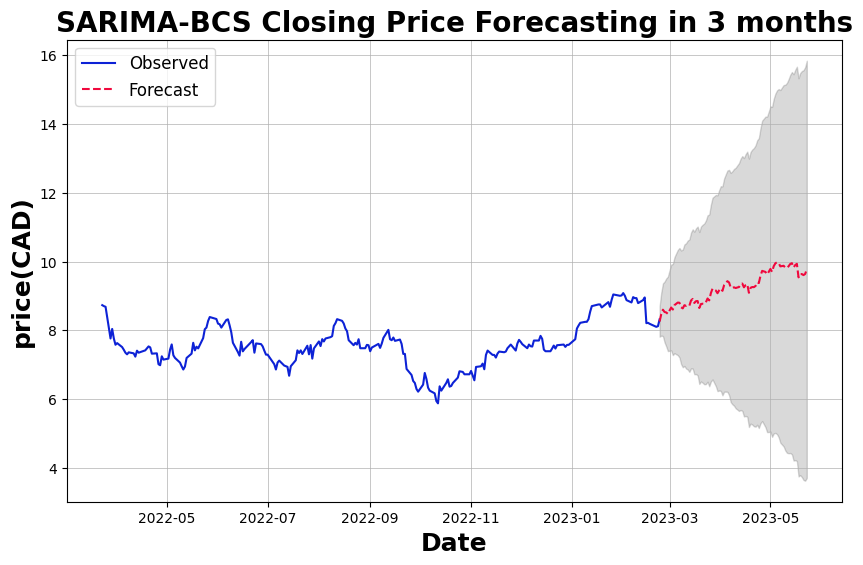

In [14]:
#plot the Forecast
plt.figure(figsize=(10,6))
plt.grid(True,linewidth=0.5)
plt.plot(bcs_df_subset_s.index[125:],bcs_df_subset_s.close[125:],label='Observed',color='#0D22D6',alpha=1,linewidth=1.5)

plt.plot(fitted_series,linestyle='--',label='Forecast',color='#F0083D', linewidth=1.5)

plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.xlabel('Date',weight='bold',size=18)
plt.ylabel('price(CAD)',weight='bold',size=18)
plt.legend(loc='upper left',fontsize='large')
plt.title("SARIMA-BCS Closing Price Forecasting in 3 months",weight='bold',size=20)
plt.show()
